## User Churn Prediction

The task: In this project, using supervised learning models, you will identify cell phone service customers who are more likely to stop using the service in the future and create a model that can predict if a certain customer will drop the service. Furthermore, it would be enlightening to analyze the top factors that influence user retention to help the company prevent user churn. The dataset contains information of customers' plans and usage of the service, as well as whether or not they stopped using the service eventually.

### Step 1: Import relevant libraries:

In [2]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [4]:
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

In [7]:
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

In [8]:
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

### Step 2: Import the dataset:

In [9]:
#import requests

#link = 'https://drive.google.com/file/d/1Ka-vsJ-axWLg8_JjAZSpnniWm7BGnj0o/view?usp=sharing'
#dataset = requests.get(link)

df = pd.read_csv('churn.all2')

### Step 3: Evaluate data structure with head & column methods:

In [10]:
df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,?,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [11]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [12]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,200.391620,99.919200,9.017732,10.261780,4.435200,2.771146,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,50.527789,19.958686,2.273763,2.761396,2.456788,0.745580,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


From the first look, we can see that the dataset contains several numerical and categorical columns providing various information on the customer contract and use of the service.

It seems like **area_code**, **intl_plan**, **voice_mail_plan**, and **churned** are categorical variables. The other variables seem to be metric (or continous). The **state** and **phone_number** variables is probably also categorical.

In [13]:
df.state

0       KS
1       OH
2       NJ
3       OH
4       OK
        ..
4995    HI
4996    WV
4997    DC
4998    DC
4999    VT
Name: state, Length: 5000, dtype: object

In [14]:
df.phone_number

0        382-4657
1        371-7191
2        358-1921
3        375-9999
4        330-6626
          ...    
4995     365-8751
4996     334-9736
4997     333-6861
4998     394-2206
4999     373-8058
Name: phone_number, Length: 5000, dtype: object

In [15]:
df.area_code

0       415
1       415
2       415
3       408
4       415
       ... 
4995    408
4996    415
4997    415
4998    510
4999    415
Name: area_code, Length: 5000, dtype: int64

Variable **state**, **phone_number** and **area_code** seem to be categorical and it is better to delete them from the dataset. 

In [16]:
df = df.drop(['state', 'area_code', 'phone_number'], axis =1)

Let's see how dataset look now. 

In [17]:
df.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,no,yes,26,161.6,123,27.47,195.5,103,?,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [18]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['account_length', 'number_vmail_messages', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls', 'number_customer_service_calls'], float64: ['total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_night_minutes', 'total_night_charge', 'total_intl_minutes', 'total_intl_charge'], object: ['intl_plan', 'voice_mail_plan', 'total_eve_charge', 'churned']}

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 5000 non-null   int64  
 1   intl_plan                      5000 non-null   object 
 2   voice_mail_plan                5000 non-null   object 
 3   number_vmail_messages          5000 non-null   int64  
 4   total_day_minutes              5000 non-null   float64
 5   total_day_calls                5000 non-null   int64  
 6   total_day_charge               5000 non-null   float64
 7   total_eve_minutes              5000 non-null   float64
 8   total_eve_calls                5000 non-null   int64  
 9   total_eve_charge               5000 non-null   object 
 10  total_night_minutes            5000 non-null   float64
 11  total_night_calls              5000 non-null   int64  
 12  total_night_charge             5000 non-null   f

It looks like we have four string variables (i.e., intl_plan, voice_mail_plan, total_eve_charge, and churned). We will need to convert these variables in to numbers.

In [20]:
# intl_plan
intl_plan = np.zeros(df.shape[0])
intl_plan[df.intl_plan == ' yes'] = 1
df.intl_plan = intl_plan

# voice_mail_plan
voice_mail_plan = np.zeros(df.shape[0])
voice_mail_plan[df.voice_mail_plan == ' yes'] = 1
df.voice_mail_plan = voice_mail_plan

# total_eve_charge
df.total_eve_charge = pd.to_numeric(df.total_eve_charge, errors = 'coerce')

# churned
churned = np.zeros(df.shape[0])
churned[df.churned == ' True.'] = 1
df.churned = churned

In [21]:
df.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,0.0,1.0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0
1,107,0.0,1.0,26,161.6,123,27.47,195.5,103,NaN,254.4,103,11.45,13.7,3,3.70,1,0.0
2,137,0.0,0.0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0
3,84,1.0,0.0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0
4,75,1.0,0.0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0


Now all variables are numeric

### Check if we have missing data

In [22]:
df.isna().any()

account_length                   False
intl_plan                        False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                  True
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                 True
number_customer_service_calls    False
churned                          False
dtype: bool

In [23]:
df.isnull().sum()

account_length                   0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 5
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                1
number_customer_service_calls    0
churned                          0
dtype: int64

It seems like we have a missing values in **total_eve_charge** and **total_intl_charge** variables. Let's check what is a percentage % of missing values.

In [24]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

account_length                   0.00
intl_plan                        0.00
voice_mail_plan                  0.00
number_vmail_messages            0.00
total_day_minutes                0.00
total_day_calls                  0.00
total_day_charge                 0.00
total_eve_minutes                0.00
total_eve_calls                  0.00
total_eve_charge                 0.10
total_night_minutes              0.00
total_night_calls                0.00
total_night_charge               0.00
total_intl_minutes               0.00
total_intl_calls                 0.00
total_intl_charge                0.02
number_customer_service_calls    0.00
churned                          0.00
dtype: float64

The amount of missing values is very small. 0,10% and 0,02%. We can replace missing values with the mean.

In [25]:
df.total_eve_charge.fillna(value = df.total_eve_charge.mean(), inplace = True)
df.total_intl_charge.fillna(value = df.total_intl_charge.mean(), inplace = True)

In [26]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

account_length                   0.0
intl_plan                        0.0
voice_mail_plan                  0.0
number_vmail_messages            0.0
total_day_minutes                0.0
total_day_calls                  0.0
total_day_charge                 0.0
total_eve_minutes                0.0
total_eve_calls                  0.0
total_eve_charge                 0.0
total_night_minutes              0.0
total_night_calls                0.0
total_night_charge               0.0
total_intl_minutes               0.0
total_intl_calls                 0.0
total_intl_charge                0.0
number_customer_service_calls    0.0
churned                          0.0
dtype: float64

Now we don't have missing values.

In [28]:
df.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,0.0,1.0,25,265.1,110,45.07,197.4,99,16.780000,244.7,91,11.01,10.0,3,2.70,1,0.0
1,107,0.0,1.0,26,161.6,123,27.47,195.5,103,17.052324,254.4,103,11.45,13.7,3,3.70,1,0.0
2,137,0.0,0.0,0,243.4,114,41.38,121.2,110,10.300000,162.6,104,7.32,12.2,5,3.29,0,0.0
3,84,1.0,0.0,0,299.4,71,50.90,61.9,88,5.260000,196.9,89,8.86,6.6,7,1.78,2,0.0
4,75,1.0,0.0,0,166.7,113,28.34,148.3,122,12.610000,186.9,121,8.41,10.1,3,2.73,3,0.0


### Check target variable distribution:

 Let’s look at the distribution of churn values. This is quite a simple yet crucial step to see if the dataset upholds any class imbalance issues.

In [26]:
df["churned"].value_counts()

0.0    4293
1.0     707
Name: churned, dtype: int64

We can see, the data set is imbalanced with a high proportion of active customers compared to their churned counterparts

### Exploratory Data Analysis:

Let’s try to explore and visualize our data set by doing distribution of independent variables to better understand the patterns in the data and to potentially form some hypothesis.

Let us see the correlations between the variables.

In [27]:
df.corr()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
account_length,1.000000,0.014681,-0.006650,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009495,0.000668,-0.007825,0.000656,0.001291,0.014277,0.001223,-0.001445,0.021203
intl_plan,0.014681,1.000000,0.009054,0.011947,0.028138,0.008102,0.028141,0.021235,0.002505,0.021120,-0.026508,0.005623,-0.026510,0.031799,0.004493,0.031545,-0.012974,0.259123
voice_mail_plan,-0.006650,0.009054,1.000000,0.954508,0.002059,-0.001735,0.002056,0.023328,-0.005916,0.023713,0.005524,0.009176,0.005522,0.004116,-0.007525,0.004054,-0.014453,-0.110698
number_vmail_messages,-0.014575,0.011947,0.954508,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019847,0.005541,0.002676,0.005535,0.002463,0.000124,0.002361,-0.007086,-0.097633
total_day_minutes,-0.001017,0.028138,0.002059,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010821,0.011799,0.004236,0.011783,-0.019486,-0.001303,-0.019512,0.002733,0.207705
total_day_calls,0.028240,0.008102,-0.001735,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000913,0.002804,-0.008308,0.002802,0.013097,0.010893,0.013216,-0.010739,0.016130
total_day_charge,-0.001019,0.028141,0.002056,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010818,0.011801,0.004235,0.011785,-0.019490,-0.001307,-0.019516,0.002726,0.207700
total_eve_minutes,-0.009591,0.021235,0.023328,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,0.999735,-0.016639,0.013420,-0.016642,0.000137,0.008388,0.000131,-0.013823,0.089288
total_eve_calls,0.009143,0.002505,-0.005916,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002864,0.001781,-0.013682,0.001799,-0.007458,0.005574,-0.007544,0.006235,-0.006284
total_eve_charge,-0.009495,0.021120,0.023713,0.019847,-0.010821,-0.000913,-0.010818,0.999735,0.002864,1.000000,-0.016855,0.013296,-0.016858,0.000480,0.008294,0.000474,-0.013894,0.089495


The following four variables are highly correlated with other four variables in the dataset:

1. total_day_charge
2. total_eve_charge
3. total_night_charge
4. total_intl_charge
We will drop them.

My action is based of the following rule: "when you have two independent variables that are very highly correlated, you definitely should remove one of them because you run into the multicollinearity conundrum and your regression model's regression coefficients related to the two highly correlated variables will be unreliable".

In [28]:
df = df.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'], axis = 1)

Let's see the columns which are left:

In [29]:
df.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_eve_minutes', 'total_eve_calls', 'total_night_minutes',
       'total_night_calls', 'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls', 'churned'],
      dtype='object')

In [30]:
df.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churned
0,128,0.0,1.0,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0.0
1,107,0.0,1.0,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0.0
2,137,0.0,0.0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0.0
3,84,1.0,0.0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0.0
4,75,1.0,0.0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0.0


In [32]:
df["number_vmail_messages"].nunique()

48

In [33]:
df.number_vmail_messages.count()

5000

The distribution of the number_vmail_messages variable is not normal or symetric. Most of the clients had zero values for this variable and some of them had non-zero values. The number of unique values is only 48 out of 5000.

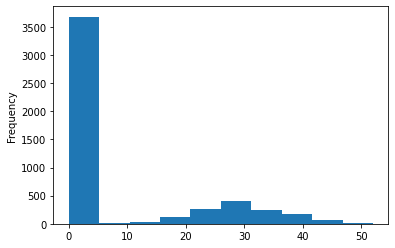

In [34]:
ax = df.number_vmail_messages.plot.hist()

In [80]:
df.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churned
0,128,0.0,1.0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0.0
1,107,0.0,1.0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0.0
2,137,0.0,0.0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0.0
3,84,1.0,0.0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0.0
4,75,1.0,0.0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0.0


<AxesSubplot:ylabel='Frequency'>

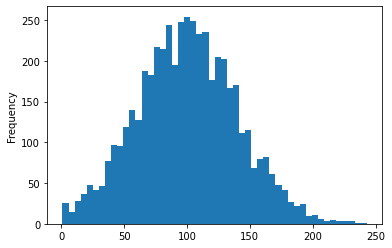

In [35]:
df.account_length.plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

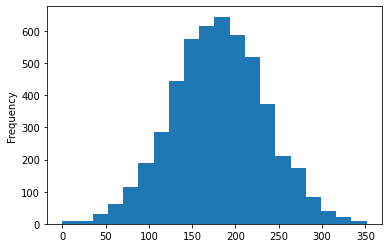

In [36]:
df.total_day_minutes.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

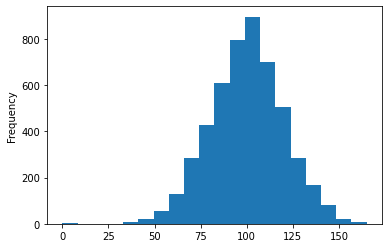

In [37]:
df.total_day_calls.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

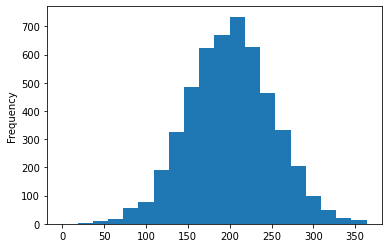

In [38]:
df.total_eve_minutes.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

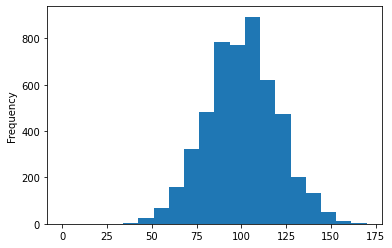

In [39]:
df.total_eve_calls.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

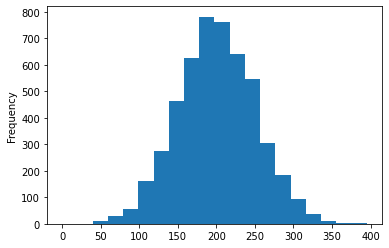

In [40]:
df.total_night_minutes.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

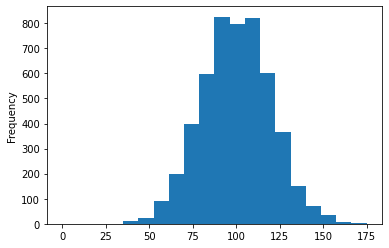

In [41]:
df.total_night_calls.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

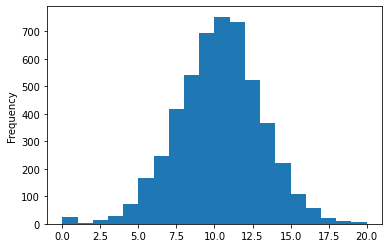

In [42]:
df.total_intl_minutes.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

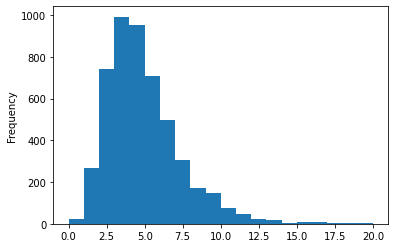

In [43]:
df.total_intl_calls.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

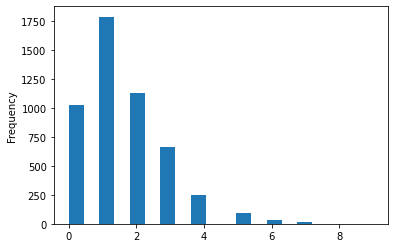

In [44]:
df.number_customer_service_calls.plot.hist(bins=20)

All the continuous variables have symetric distributions, except the last two (i.e., total_intl_calls and number_customer_service_calls). It seems like I do not need to transform any of the continuous variables except standardizing them.

Let us see the frequency distributions of the categorical variables.

In [46]:
for col in ['voice_mail_plan', 'number_vmail_messages', 'churned']:
    print('column name: {}\n{}\n'.format(col, df[col].value_counts()))

column name: voice_mail_plan
0.0    3677
1.0    1323
Name: voice_mail_plan, dtype: int64

column name: number_vmail_messages
0     3678
31      83
28      67
29      67
33      66
24      64
27      64
30      58
26      58
32      57
23      52
25      51
22      47
36      45
37      43
39      42
34      41
35      41
21      41
38      41
20      32
40      28
19      27
41      22
17      21
42      19
18      18
16      17
43      16
15      13
45      11
12      11
14       9
44       9
46       8
48       5
13       4
47       4
10       4
49       3
6        2
9        2
50       2
11       2
8        2
4        1
51       1
52       1
Name: number_vmail_messages, dtype: int64

column name: churned
0.0    4293
1.0     707
Name: churned, dtype: int64



All looks good. But, the dataset is unbalanced. There are 707 positive cases and 4293 negative cases. If I train the dataset as is, it will be trained based on negative values. In that case, I will probably have high accuracy, but I may have lower recall or precision. Therefore, I will train the dataset in two different ways. First, I will use the entire dataset and see what I get. Then, I will oversample the positive cases and train the data again.

### Run three algorithms using unbalanced dataset

In [47]:
# Create the input and output matrices, split them into train and test
df_ = df.values
X = np.array(df_[:,:-1])
y = np.array(df_[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [48]:
# Scale the input variables using the standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**

In [49]:
# Fit a logistic regression model using the train set
logreg = LogisticRegression(solver = 'lbfgs')
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [50]:
# See the score (accuracy)
logreg.score(X_test_scaled, y_test.astype('int'))

0.8744

In [51]:
cvs = cross_val_score(LogisticRegression(), X_train_scaled, y_train, cv = 10)
np.mean(cvs), np.std(cvs)

(0.8594666666666667, 0.010736438474238616)

In [52]:

# Create a confusion matrix and see precision and recall
cm = confusion_matrix(y_test, logreg.predict(X_test_scaled))
print('recall: {}'.format(cm[1,1] / sum(cm[1])))
print('precision: {}'.format(cm[1,1] / (cm[0,1] + cm[1,1])))

recall: 0.23214285714285715
precision: 0.582089552238806


In the first run (see above), although accuracy is high, recall and precision are very low.

**Voting Classifier: Logistic regression + decision tree**

In [56]:
from sklearn.ensemble import VotingClassifier
# Use an ensemble model and see if anything changes
# Create the model and fit
voting = VotingClassifier([('logreg', LogisticRegression(C=100, solver='lbfgs')),
                          ('tree', DecisionTreeClassifier(max_depth=3))], voting = 'soft', flatten_transform=False)
voting.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression(C=100)),
                             ('tree', DecisionTreeClassifier(max_depth=3))],
                 flatten_transform=False, voting='soft')

In [57]:
# See the score (accuracy)
voting.score(X_test_scaled, y_test)

0.9104

In [58]:
cvs = cross_val_score(
    VotingClassifier([('logreg', LogisticRegression(C=100, solver='lbfgs')),
                      ('tree', DecisionTreeClassifier(max_depth=3))], voting = 'soft', flatten_transform=False),
                    X_train_scaled, y_train, cv = 10)
np.mean(cvs), np.std(cvs)

(0.8981333333333332, 0.010034606785187607)

In [59]:
# Create a confusion matrix and see precision and recall
cm = confusion_matrix(y_test, voting.predict(X_test_scaled))
print('recall: {}'.format(cm[1,1] / sum(cm[1])))
print('precision: {}'.format(cm[1,1] / (cm[0,1] + cm[1,1])))

recall: 0.42857142857142855
precision: 0.8181818181818182


Again, the accuracy is high. Precision is also better. But recall is still too low.

**Random Forest**

In [61]:
# Let us try another ensemble model, random forest.
rf = RandomForestClassifier(n_estimators = 10, warm_start=True)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, warm_start=True)

In [62]:
rf.score(X_test_scaled, y_test)

0.952

In [63]:
cvs = cross_val_score(RandomForestClassifier(), X_train_scaled, y_train, cv = 10)
np.mean(cvs), np.std(cvs)

(0.9479999999999998, 0.008369255907453452)

In [65]:
# Create a confusion matrix and see precision and recall
cm = confusion_matrix(y_test, rf.predict(X_test_scaled))
print('recall: {}'.format(cm[1,1] / sum(cm[1])))
print('precision: {}'.format(cm[1,1] / (cm[0,1] + cm[1,1])))

recall: 0.7083333333333334
precision: 0.9153846153846154


Here both recall and precision are high.

### Run three algorithms using balanced dataset

Here I will make a balanced dataset and train that dataset.

The next cell creates the balanced dataset. Here is how I do that. First, I select all positive cases. Then, I select a sample from the negative cases, and this sample's size is the same as the number of positive cases in the entire dataset.

In [66]:
dff = df.loc[df.churned == 0]
dft = df.loc[df.churned == 1]
df_ = pd.concat([dft, dff.sample(dft.shape[0])])
df_ = df_.values

In [67]:
X = np.array(df_[:,:-1])
y = np.array(df_[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
y_train = y_train.astype('int')

**Logistic regression**

In [71]:
logreg = LogisticRegression(solver = 'lbfgs')
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [72]:
logreg.score(X_test_scaled, y_test.astype('int'))

0.7909604519774012

In [73]:
cvs = cross_val_score(LogisticRegression(), X_train_scaled, y_train, cv = 10)
np.mean(cvs), np.std(cvs)

(0.7726415094339623, 0.04143432312452408)

In [74]:
cm = confusion_matrix(y_test, logreg.predict(X_test_scaled))
print('recall: {}'.format(cm[1,1] / sum(cm[1])))
print('precision: {}'.format(cm[1,1] / (cm[0,1] + cm[1,1])))

recall: 0.7678571428571429
precision: 0.7865853658536586


Both recall and precision are good but can better.

**Voting classifier: Logistic regression + decision tree**

In [77]:
voting = VotingClassifier([('logreg', LogisticRegression(C=100, solver='lbfgs')),
                          ('tree', DecisionTreeClassifier(max_depth=3))], voting = 'soft', flatten_transform=False)

In [78]:
voting.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression(C=100)),
                             ('tree', DecisionTreeClassifier(max_depth=3))],
                 flatten_transform=False, voting='soft')

In [79]:
voting.score(X_test_scaled, y_test)

0.8107344632768362

In [80]:
cvs = cross_val_score(
    VotingClassifier([('logreg', LogisticRegression(C=100, solver='lbfgs')),
                      ('tree', DecisionTreeClassifier(max_depth=3))], voting = 'soft', flatten_transform=False),
                    X_train_scaled, y_train, cv = 10)
np.mean(cvs), np.std(cvs)

(0.8349056603773585, 0.031359943657725764)

In [81]:
cm = confusion_matrix(y_test, voting.predict(X_test_scaled))
print('recall: {}'.format(cm[1,1] / sum(cm[1])))
print('precision: {}'.format(cm[1,1] / (cm[0,1] + cm[1,1])))

recall: 0.7678571428571429
precision: 0.821656050955414


Now they are higher 

**Random Forest**

In [82]:
rf = RandomForestClassifier(n_estimators = 10, warm_start=True)

In [83]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=10, warm_start=True)

In [84]:
rf.score(X_test_scaled, y_test)

0.8333333333333334

In [85]:
cvs = cross_val_score(RandomForestClassifier(), X_train_scaled, y_train, cv = 10)
np.mean(cvs), np.std(cvs)

(0.8830188679245283, 0.028676762553906908)

In [86]:
cm = confusion_matrix(y_test, rf.predict(X_test_scaled))
print('recall: {}'.format(cm[1,1] / sum(cm[1])))
print('precision: {}'.format(cm[1,1] / (cm[0,1] + cm[1,1])))

recall: 0.8035714285714286
precision: 0.8385093167701864


They are both good.

Among all the models that I tried above, random forest is the best model. Voting classifier is also as good as random forest. I could do some paramater tuning to improve the models. I will try that on random forest, because it is easier to do. I could adjust the debth of the trees, number of trees, and maybe the minimum size of leaves. I will try only one of these options; I will search for the optimum number of trees. For it takes a lot of time to run grid search and random forests, I will limit the number of trees between 5 and 50.

In [87]:
from sklearn.model_selection import GridSearchCV

param = {'n_estimators': np.arange(5, 50, 5)}

grid = GridSearchCV(rf, param_grid = param, cv = 10)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=10, warm_start=True),
             param_grid={'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45])})

In [88]:
grid.score(X_test_scaled, y_test)

0.867231638418079

In [89]:
grid.best_params_.get('n_estimators')

45

Now let us create a random forest using the optimum number of trees, and then see the precision and recall.

In [90]:
rf = RandomForestClassifier(n_estimators = grid.best_params_.get('n_estimators'), warm_start=True)
rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.8615819209039548

In [92]:
cm = confusion_matrix(y_test, rf.predict(X_test_scaled))
print('recall: {}'.format(cm[1,1] / sum(cm[1])))
print('precision: {}'.format(cm[1,1] / (cm[0,1] + cm[1,1])))

recall: 0.8273809523809523
precision: 0.8742138364779874


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 5000 non-null   int64  
 1   intl_plan                      5000 non-null   float64
 2   voice_mail_plan                5000 non-null   float64
 3   number_vmail_messages          5000 non-null   int64  
 4   total_day_minutes              5000 non-null   float64
 5   total_day_calls                5000 non-null   int64  
 6   total_day_charge               5000 non-null   float64
 7   total_eve_minutes              5000 non-null   float64
 8   total_eve_calls                5000 non-null   int64  
 9   total_eve_charge               5000 non-null   float64
 10  total_night_minutes            5000 non-null   float64
 11  total_night_calls              5000 non-null   int64  
 12  total_night_charge             5000 non-null   f

**Churn Rate by Contract plan (intl_plan:)**

In [31]:
df.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,0.0,1.0,25,265.1,110,45.07,197.4,99,16.780000,244.7,91,11.01,10.0,3,2.70,1,0.0
1,107,0.0,1.0,26,161.6,123,27.47,195.5,103,17.052324,254.4,103,11.45,13.7,3,3.70,1,0.0
2,137,0.0,0.0,0,243.4,114,41.38,121.2,110,10.300000,162.6,104,7.32,12.2,5,3.29,0,0.0
3,84,1.0,0.0,0,299.4,71,50.90,61.9,88,5.260000,196.9,89,8.86,6.6,7,1.78,2,0.0
4,75,1.0,0.0,0,166.7,113,28.34,148.3,122,12.610000,186.9,121,8.41,10.1,3,2.73,3,0.0


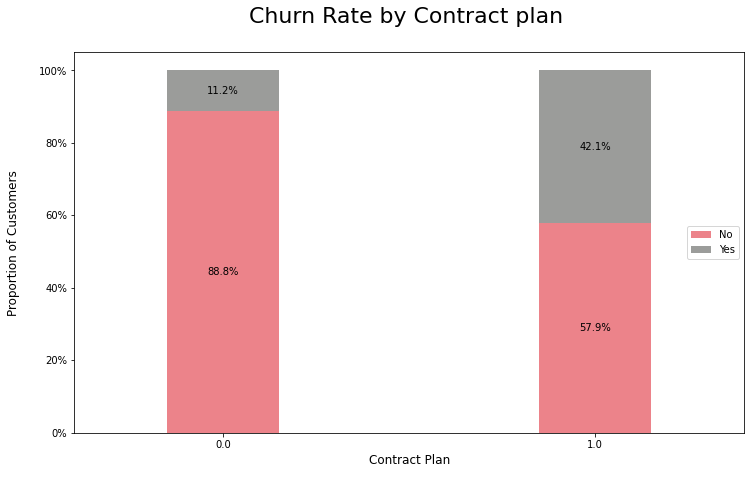

In [36]:
import matplotlib.ticker as mtick

contract_churn = df.groupby(['intl_plan','churned']).size().unstack()

contract_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Plan\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Contract plan \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

The customers with Intl_plan (probably it means international contract plan) have the higher probability to churn compared to the customers without this plan.

**Churn Rate by number of customer service call**

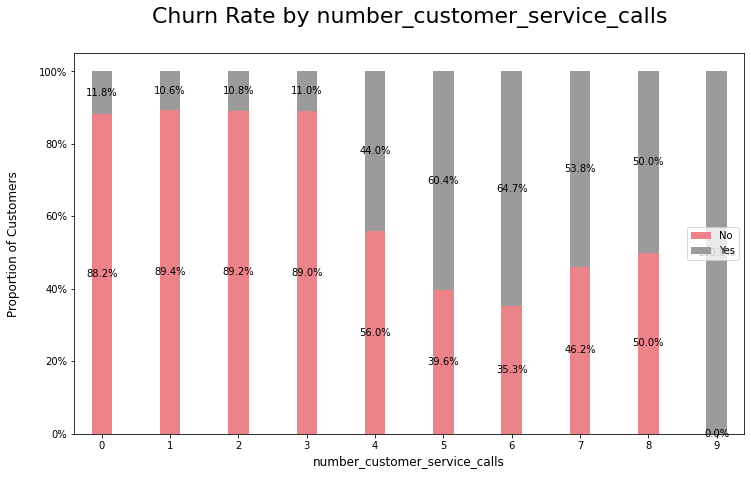

In [44]:
import matplotlib.ticker as mtick

number_customer_service_calls_churn = df.groupby(['number_customer_service_calls','churned']).size().unstack()

number_customer_service_calls_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (number_customer_service_calls_churn.T*100.0 / number_customer_service_calls_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('number_customer_service_calls\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by number_customer_service_calls\n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

If the number of customer care calls is between 0-3, the probability to churn is the same between 10-12%, very low.
If the number of customer care calls is between 4-8, the probability for the customer to churn is 35,3-56%.
If the number of customer care calls is 9 (or more, I guess), the probability for the customer to churn is very hight 

https://github.com/haciduru/Predicting-customer-churn/blob/83c9d8211272d3da6bc75c03ce28945b91a271c3/Predicting%20customer%20churn.ipynb

**Churn Rate by account_length**

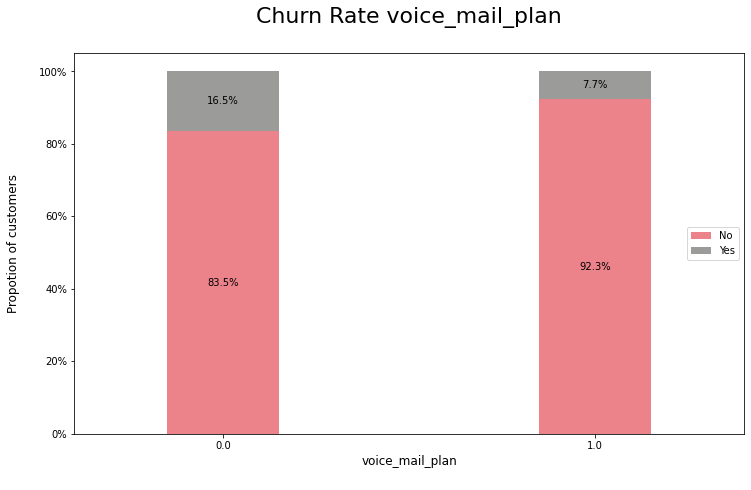

In [53]:
import matplotlib.ticker as mtick

voice_mail_plan_churn = df.groupby(['voice_mail_plan','churned']).size().unstack()

voice_mail_plan_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (voice_mail_plan_churn.T*100.0 / voice_mail_plan_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Propotion of customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('voice_mail_plan\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate voice_mail_plan\n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

The customers with voice mail plan has 16,5% probability to churn.
The customers without voice mail plan has only 7,7% probability to churn